In [15]:
import numpy as np

path_to_samples = '../bayes_implicit_solvent/data/radii_samples_C.npy'

In [16]:
radius_samples = np.load(path_to_samples)
radius_samples.shape

(100001, 5)

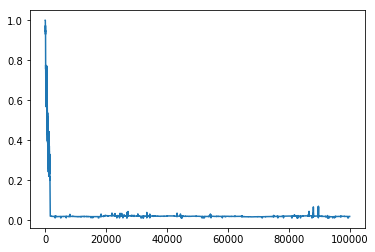

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(radius_samples[:,0])

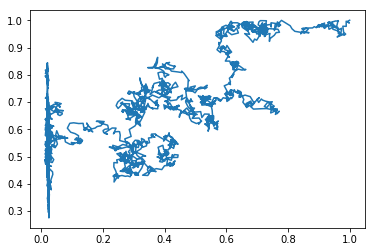

In [18]:
plt.plot(radius_samples[:,0], radius_samples[:,1])

In [19]:
from sklearn.decomposition import PCA
pca = PCA()

In [46]:
burn_in = 10000

In [47]:
pca.fit(radius_samples[burn_in:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

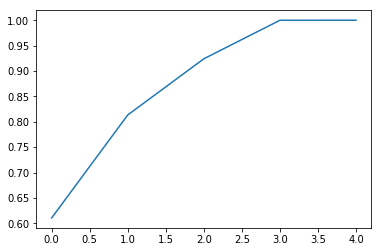

In [48]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.ylim(0,1)

In [50]:
y = pca.transform(radius_samples[burn_in:])

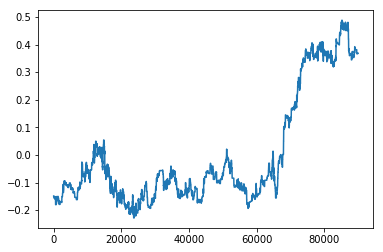

In [51]:
plt.plot(y[:,0])

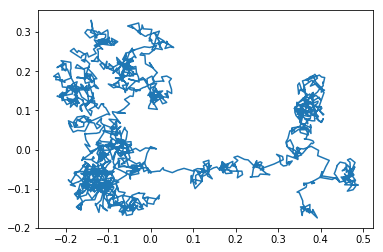

In [52]:
plt.plot(y[:,0], y[:,1])

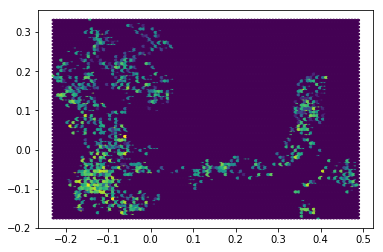

In [40]:
plt.hexbin(y[:,0], y[:,1], bins='log')

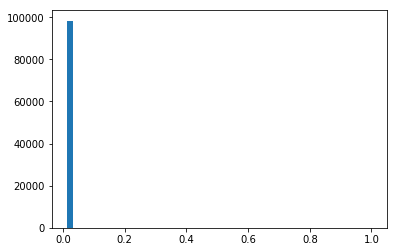

In [41]:
plt.hist(radius_samples[:,0], bins=50);

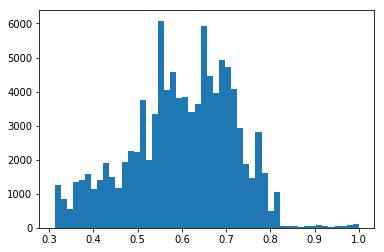

In [42]:
plt.hist(radius_samples[:,-1], bins=50);

In [43]:
atom_names = ['C1', 'H1', 'H2', 'H3', 'H4']

In [44]:
radius_samples[:,0].min(), radius_samples[:,0].max()

(0.01268190544290762, 1.0)

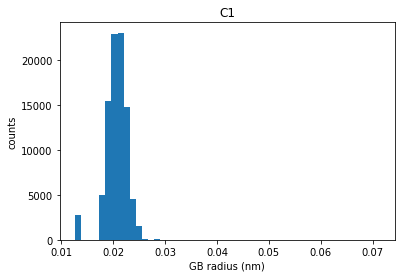

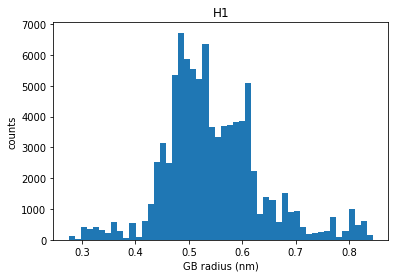

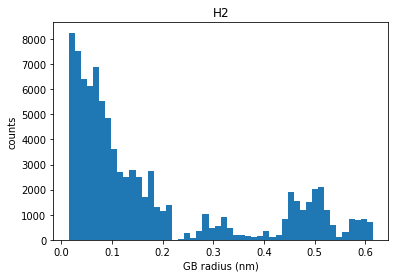

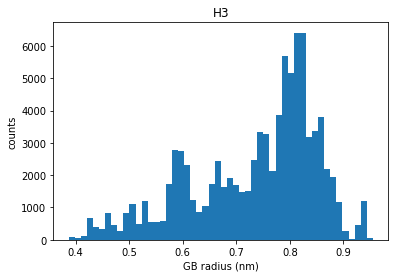

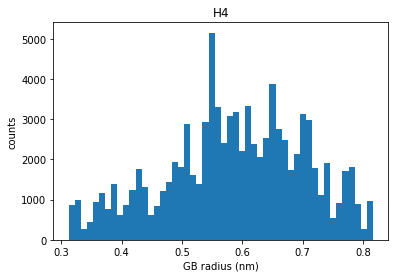

In [63]:
for i in range(radius_samples.shape[1]):
    plt.figure()
    plt.title(atom_names[i])
    plt.hist(radius_samples[burn_in:,i], bins=50);
    plt.xlabel('GB radius (nm)')
    plt.ylabel('counts')

In [64]:
# so, that's super funky: I would expect H1-H4 to all have identical distributions of GB radii

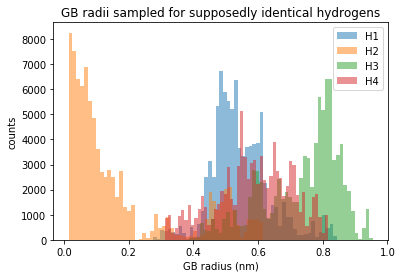

In [65]:
for i in range(radius_samples.shape[1])[1:]:
    plt.title('GB radii sampled for supposedly identical hydrogens')
    plt.hist(radius_samples[burn_in:,i], bins=50, alpha=0.5, label=atom_names[i]);
    plt.xlabel('GB radius (nm)')
    plt.ylabel('counts')
plt.legend()

Text(0, 0.5, 'radius of H3 (in nm)')

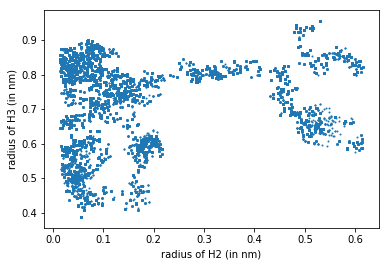

In [66]:
x = 2
y = 3

plt.scatter(radius_samples[burn_in:, x], radius_samples[burn_in:, y], s=1)
plt.xlabel('radius of {} (in nm)'.format(atom_names[x]))
plt.ylabel('radius of {} (in nm)'.format(atom_names[y]))

Text(0, 0.5, 'radius of H4 (in nm)')

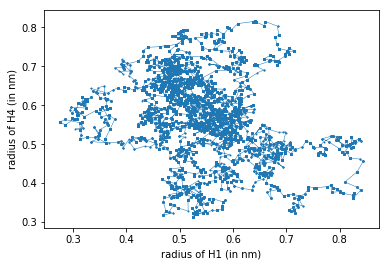

In [67]:
x = 1
y = 4

plt.plot(radius_samples[burn_in:, x], radius_samples[burn_in:, y], linewidth=0.5)
plt.scatter(radius_samples[burn_in:, x], radius_samples[burn_in:, y], s=1)
plt.xlabel('radius of {} (in nm)'.format(atom_names[x]))
plt.ylabel('radius of {} (in nm)'.format(atom_names[y]))

In [68]:
from bayes_implicit_solvent.solvation_free_energy import predict_solvation_free_energy

In [70]:
from bayes_implicit_solvent.posterior_sampling import Molecule
mol = Molecule('C')

100%|██████████| 50/50 [01:38<00:00,  1.97s/it]


In [73]:
mol.predict_solvation_free_energy(radius_samples[-1])

(3.367875647947751, 0.001499320330015012)

In [74]:
mol.predict_solvation_free_energy(radius_samples[-1][np.array([0,4,3,2,1])])

(3.367527144868541, 0.0015867903819078554)

In [75]:
mol.predict_solvation_free_energy(radius_samples[-1][np.array([0,1,3,2,4])])

(3.367508927406479, 0.0015484163131197228)

In [76]:
# funky, why are these very slightly different?

In [80]:
mean_preds = []
stddev_preds = []
for r in radius_samples[2*burn_in::100]:
    mean, stddev = mol.predict_solvation_free_energy(r)
    mean_preds.append(mean)
    stddev_preds.append(stddev)

Text(0.5, 0, '$\\Delta G_{solv}$ ($k_B T$)')

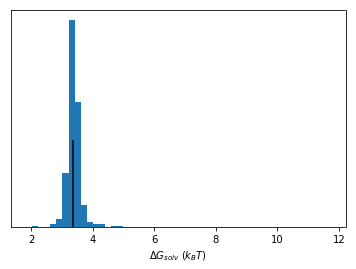

In [97]:
plt.hist(mean_preds, bins=50, density=True);

plt.vlines(mol.experimental_value, 0, 1.0)

plt.yticks([])

plt.xlabel(r'$\Delta G_{solv}$ ($k_B T$)')

In [101]:
np.mean(mean_preds), np.std(mean_preds) * 1.96

(3.4114115608966156, 0.8882621510424416)

In [87]:
np.mean(mean_preds)

3.4114115608966156

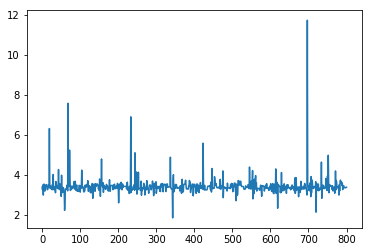

In [82]:
plt.plot(mean_preds)

In [83]:
np.max(stddev_preds)

0.022984133289434792

In [84]:
from bayes_implicit_solvent.solvation_free_energy import db

In [86]:
for i in range(len(db)):
    if db[i][1] == 'C':
        print(i)
        print(db[i])

593
['mobley_9055303', 'C', 'methane', '2.00', '0.20', '2.45', '0.01', '10.1039/P29900000291', '10.1021/jp0667442', 'Experimental uncertainty as suggested by 10.1039/P29900000291 -- 0.2 kcal/mol.  ']


In [89]:
from simtk import unit

2.0 * unit.kilocalorie_per_mole / (1.0 * unit.kilojoule_per_mole)

8.368

In [90]:
mol.experimental_value

3.375609170943315

In [91]:
mol.experimental_uncertainty

0.3375609170943315

In [93]:
db[mol.mol_index_in_freesolv]

['mobley_9055303',
 'C',
 'methane',
 '2.00',
 '0.20',
 '2.45',
 '0.01',
 '10.1039/P29900000291',
 '10.1021/jp0667442',
 'Experimental uncertainty as suggested by 10.1039/P29900000291 -- 0.2 kcal/mol.  ']

## Constrained to have only two types: H and not H

In [106]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_C.npy'

In [107]:
radius_samples = np.load(path_to_samples)

In [108]:
x = radius_samples[burn_in:]

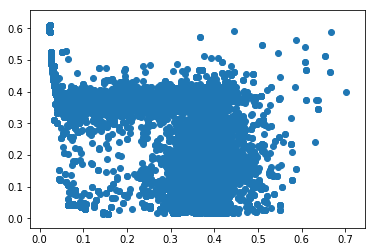

In [109]:
plt.scatter(x[:,0], x[:,1])

Text(0, 0.5, 'H radius (nm)')

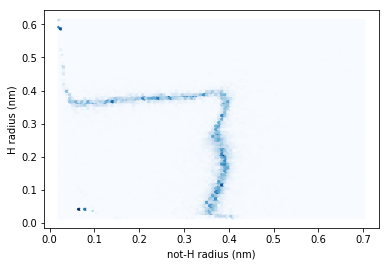

In [113]:
plt.hexbin(x[:,0], x[:,1], cmap='Blues')
plt.xlabel('not-H radius (nm)')
plt.ylabel('H radius (nm)')

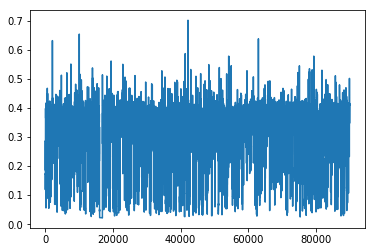

In [112]:
plt.plot(x[:,0])

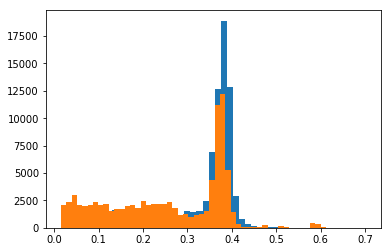

In [115]:
plt.hist(x[:,0], bins=50);
plt.hist(x[:,1], bins=50);

In [ ]:
x = radius_samples[burn_in:]